## Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load First File

In [6]:
file1 = pd.read_excel('��بصمات الخروج فقط للموظفين (1)�.xlsx')
file1.head()

,ID,DateTime,Type
0,40100635,2022-12-31 19:02:20,OUT
1,40100638,2022-12-31 18:59:01,OUT
2,40800348,2022-12-31 17:38:17,OUT
3,40100555,2022-12-31 16:29:25,OUT
4,40100659,2022-12-31 14:01:25,OUT


## Load Second File

In [7]:
file2 = pd.read_excel('��متابعة الانصراف (1) (1)�.xlsx')
file2.head()

,M,ID,Sex,Formation,Rank,Class,Job title,qualification
0,1,40100635,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary
1,2,40100429,feminine,General staff ladder,Fifth place,Class 08,Security and safety supervisor,secondary
2,3,40100513,feminine,General staff ladder,Eighth place,Class 11,manager assistant,Diploma after bachelor's degree
3,4,40100383,feminine,General staff ladder,Seventh place,Class 08,Security and safety supervisor,Bachelor's
4,5,40100840,male,General staff ladder,Tenth place,Class 15,Advanced public relations specialist,Bachelor's


## Merge 2 Dataframes

In [8]:
file2.columns = file2.columns.str.strip()
file1.columns = file1.columns.str.strip()


In [9]:
data = pd.merge(file1, file2 ,on = 'ID')
data.head()

,ID,DateTime,Type,M,Sex,Formation,Rank,Class,Job title,qualification
0,40100635,2022-12-31 19:02:20,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary
1,40100635,2022-12-31 13:03:02,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary
2,40100635,2022-12-30 18:50:23,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary
3,40100635,2022-12-30 13:09:01,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary
4,40100635,2022-12-29 19:05:26,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary


## EDA

In [10]:
data.shape

(73035, 10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73035 entries, 0 to 73034
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             73035 non-null  int64         
 1   DateTime       73035 non-null  datetime64[ns]
 2   Type           73035 non-null  object        
 3   M              73035 non-null  object        
 4   Sex            73035 non-null  object        
 5   Formation      73035 non-null  object        
 6   Rank           73035 non-null  object        
 7   Class          73035 non-null  object        
 8   Job title      73035 non-null  object        
 9   qualification  62133 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 6.1+ MB


**Statistics Summary**

In [12]:
data.describe()

,ID
count,7.303500e+04
mean,4.010057e+07
std,1.501584e+02
min,4.010032e+07
25%,4.010043e+07
50%,4.010057e+07
75%,4.010070e+07
max,4.010085e+07


In [13]:
data.describe(include = 'object')

,Type,M,Sex,Formation,Rank,Class,Job title,qualification
count,73035,73035,73035,73035,73035,73035,73035,62133
unique,1,389,2,1,9,14,96,9
top,OUT,9,feminine,General staff ladder,Seventh place,Class 07,manager assistant,Bachelor's
freq,73035,476,38592,73035,21581,12933,17022,35741


**Check nulls count**

In [14]:
data.isna().sum()

ID                   0
DateTime             0
Type                 0
M                    0
Sex                  0
Formation            0
Rank                 0
Class                0
Job title            0
qualification    10902
dtype: int64

In [15]:
data['qualification'].unique()

array([' secondary', nan, " Bachelor's", ' middle', ' Primary',
       ' Post-secondary diploma', " Master's",
       " Diploma after bachelor's degree", ' Ph.D', ' Literacy'],
      dtype=object)

**Remove unwanted spaces in values**

In [16]:
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [17]:
data['qualification'].unique()

array(['secondary', nan, "Bachelor's", 'middle', 'Primary',
       'Post-secondary diploma', "Master's",
       "Diploma after bachelor's degree", 'Ph.D', 'Literacy'],
      dtype=object)

**Fill missing values in qualification column with unknown**

In [18]:
data['qualification'] = data['qualification'].fillna('unknown')
data['qualification'].unique()

array(['secondary', 'unknown', "Bachelor's", 'middle', 'Primary',
       'Post-secondary diploma', "Master's",
       "Diploma after bachelor's degree", 'Ph.D', 'Literacy'],
      dtype=object)

**double check if filling the nulls working correctly**

In [19]:
data.isna().sum()

ID               0
DateTime         0
Type             0
M                0
Sex              0
Formation        0
Rank             0
Class            0
Job title        0
qualification    0
dtype: int64

**Check and remove duplications**

In [20]:
data.duplicated().sum()

2094

In [21]:
print('Data size with duplicaion: ', data.shape[0])
data = data.drop_duplicates()
print('Data size without duplicaion: ', data.shape[0])

Data size with duplicaion:  73035
Data size without duplicaion:  70941


**Explore the different values frequency in some columns**

In [22]:
data.columns

Index(['ID', 'DateTime', 'Type', 'M', 'Sex', 'Formation', 'Rank', 'Class',
       'Job title', 'qualification'],
      dtype='object')

In [23]:
cols = ['Sex' , 'qualification' , 'Class' , 'Rank']

for col in cols:
    print(data[col].value_counts())
    print('*'*100)

feminine    37451
male        33490
Name: Sex, dtype: int64
****************************************************************************************************
Bachelor's                         34842
unknown                            10585
secondary                           8835
Post-secondary diploma              7827
Diploma after bachelor's degree     3395
Master's                            2830
middle                              1376
Primary                              948
Literacy                             183
Ph.D                                 120
Name: qualification, dtype: int64
****************************************************************************************************
Class 07    12494
Class 08    10929
Class 09     9706
Class 11     7724
Class 04     6977
Class 06     6909
Class 05     5670
Class 10     2450
Class 12     1879
Class 03     1787
Class 15     1524
Class 13     1181
Class 02     1167
Class 14      544
Name: Class, dtype: int64
****************

## Data Visualization

**Analyzing the regularity of attendance and departure based on academic qualification**

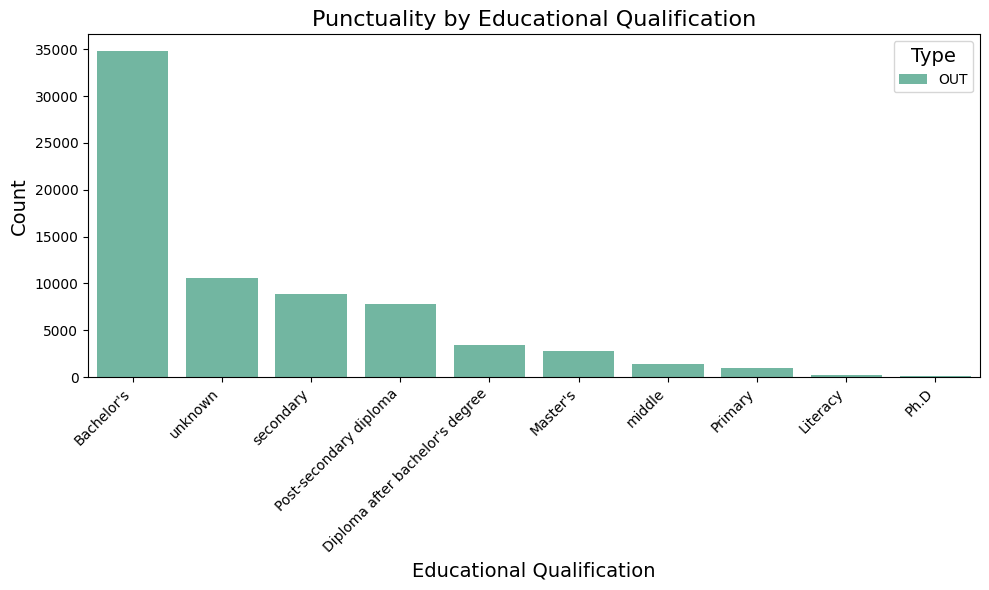

In [24]:
# Calculate the count of each category in the 'qualification' column
qualification_counts = data['qualification'].value_counts()

# Get the categories sorted by count
qualification_order = qualification_counts.index.tolist()

plt.figure(figsize=(10, 6))
sns.countplot(x='qualification', hue='Type', data=data, palette='Set2', order=qualification_order)
plt.title('Punctuality by Educational Qualification', fontsize=16)
plt.xlabel('Educational Qualification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type', title_fontsize='14')
plt.tight_layout()
plt.show()


**Comparison of attendance and departure patterns between males and females**

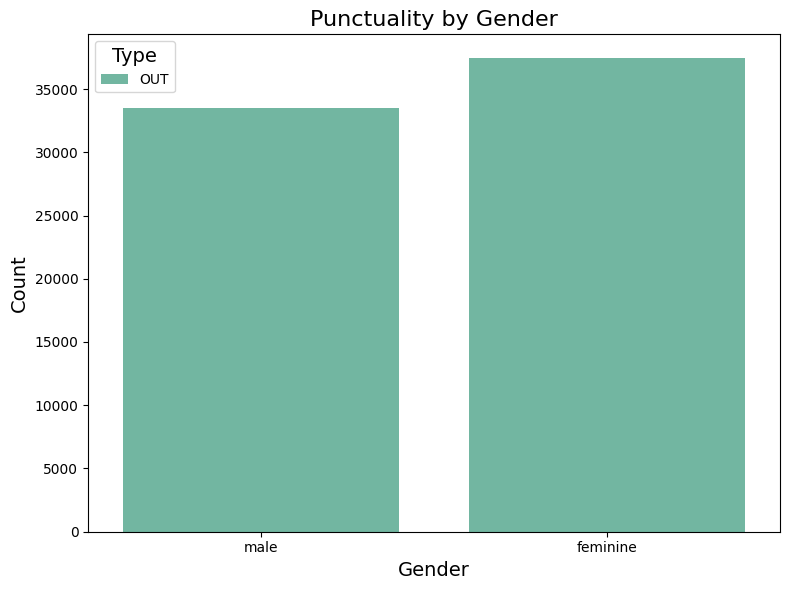

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Type', data=data, palette='Set2')
plt.title('Punctuality by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Type', title_fontsize='14')
plt.tight_layout()
plt.show()

**Analyzing data to see the relationship between job rank and employees’ commitment to working hours**

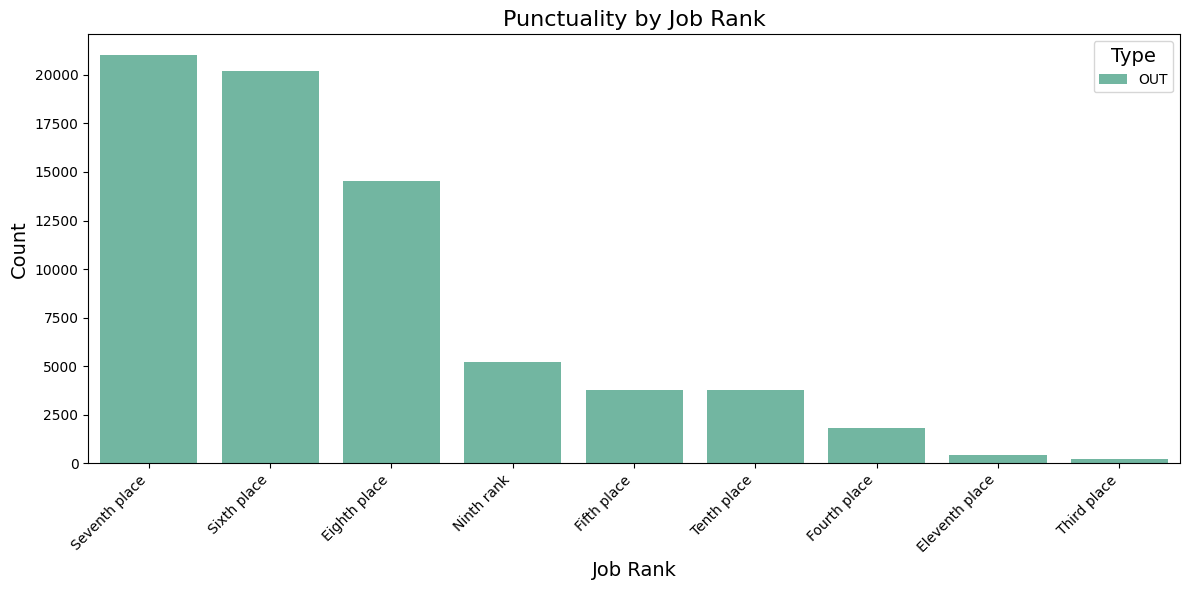

In [27]:

# Calculate the count of each category in the 'Rank' column
rank_counts = data['Rank'].value_counts()

# Get the categories sorted by count
rank_order = rank_counts.index.tolist()

plt.figure(figsize=(12, 6))
sns.countplot(x='Rank', hue='Type', data=data, palette='Set2', order=rank_order)
plt.title('Punctuality by Job Rank', fontsize=16)
plt.xlabel('Job Rank', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type', title_fontsize='14')
plt.tight_layout()
plt.show()


**Examining the extent to which the job affects discipline at work**

<ipython-input-28-67995dd3420d>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


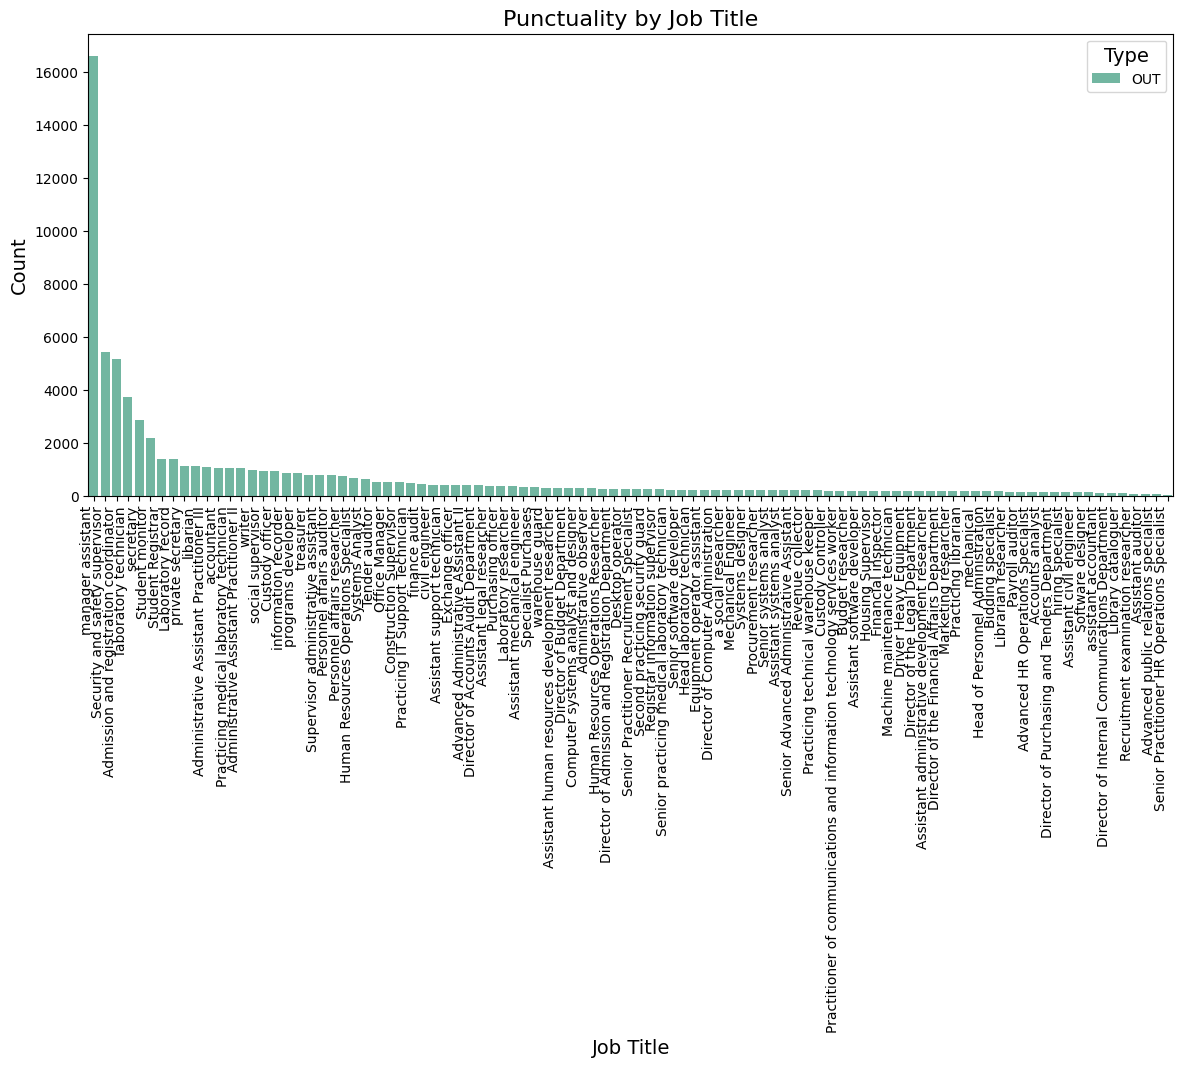

In [28]:

# Calculate the count of each category in the 'Job title' column
Job_title_counts = data['Job title'].value_counts()

# Get the categories sorted by count
Job_title_order = Job_title_counts.index.tolist()

plt.figure(figsize=(14, 6))
sns.countplot(x='Job title', hue='Type', data=data, palette='Set2', order=Job_title_order)
plt.title('Punctuality by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Type', title_fontsize='14')
plt.tight_layout()
plt.show()


**Analyzing attendance and departure data across months to monitor patterns**

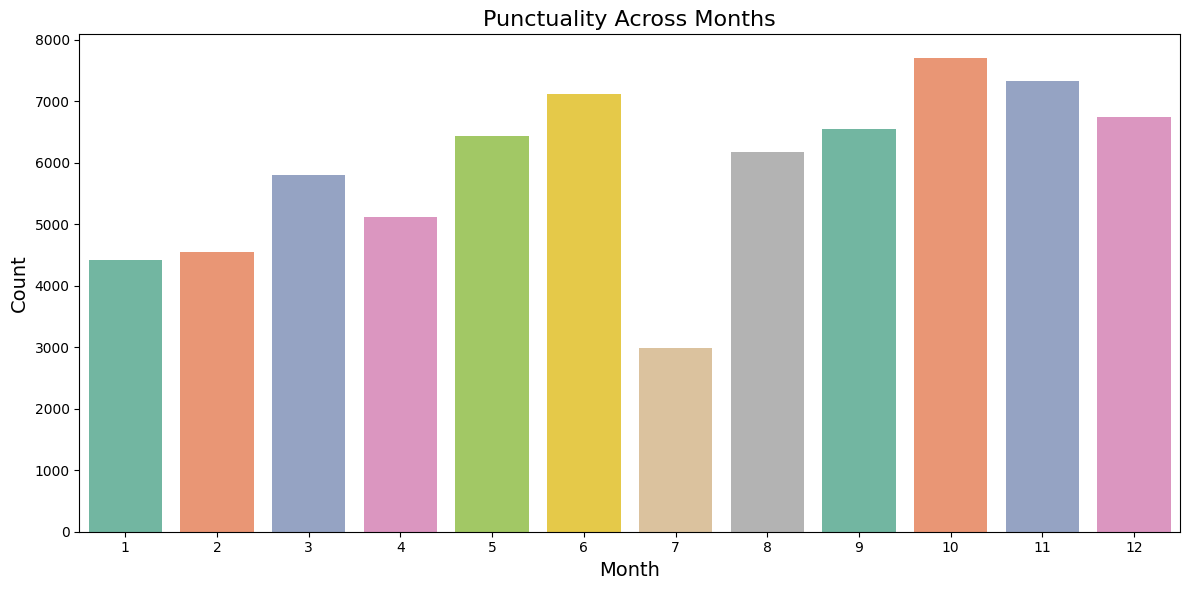

In [33]:
data['Month'] = data['DateTime'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data, palette='Set2', hue='Month', legend=False)
plt.title('Punctuality Across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

**Analyzing attendance and departure data across days of the week to monitor patterns**

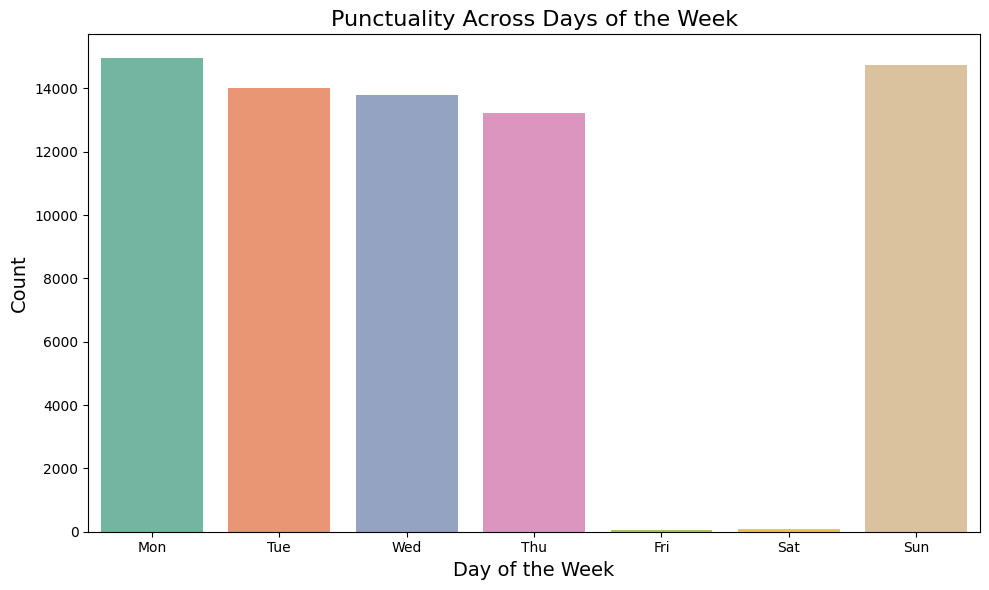

In [34]:

data['DayOfWeek'] = data['DateTime'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=data, palette='Set2', hue='DayOfWeek', legend=False)
plt.title('Punctuality Across Days of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


**Discover the rate of punctuality during the days of the week for all job ranks**

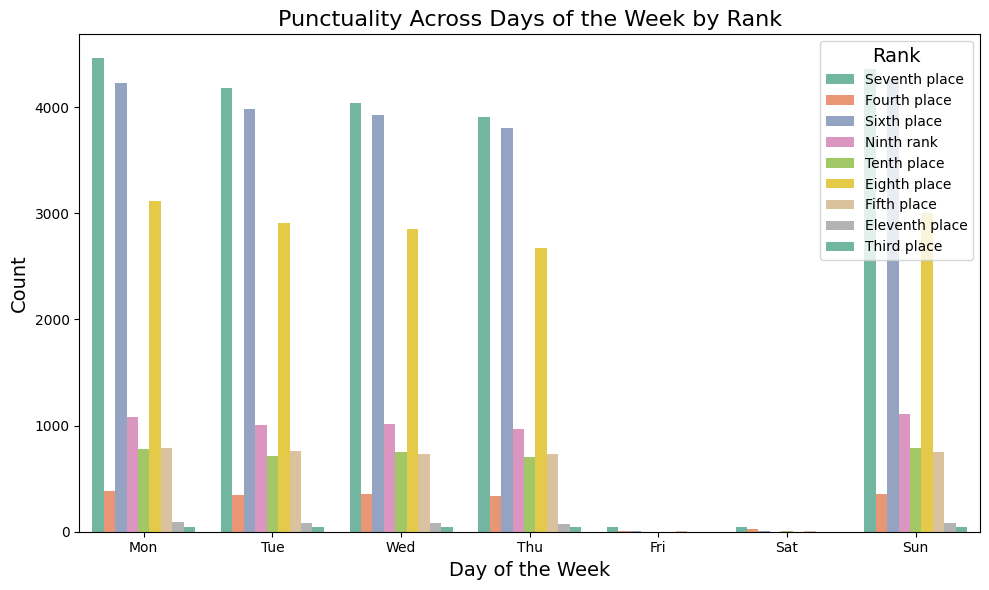

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', hue='Rank', data=data, palette='Set2')
plt.title('Punctuality Across Days of the Week by Rank', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.legend(title='Rank', title_fontsize='14')
plt.show()

**Discover the rate of punctuality across months for both genders**

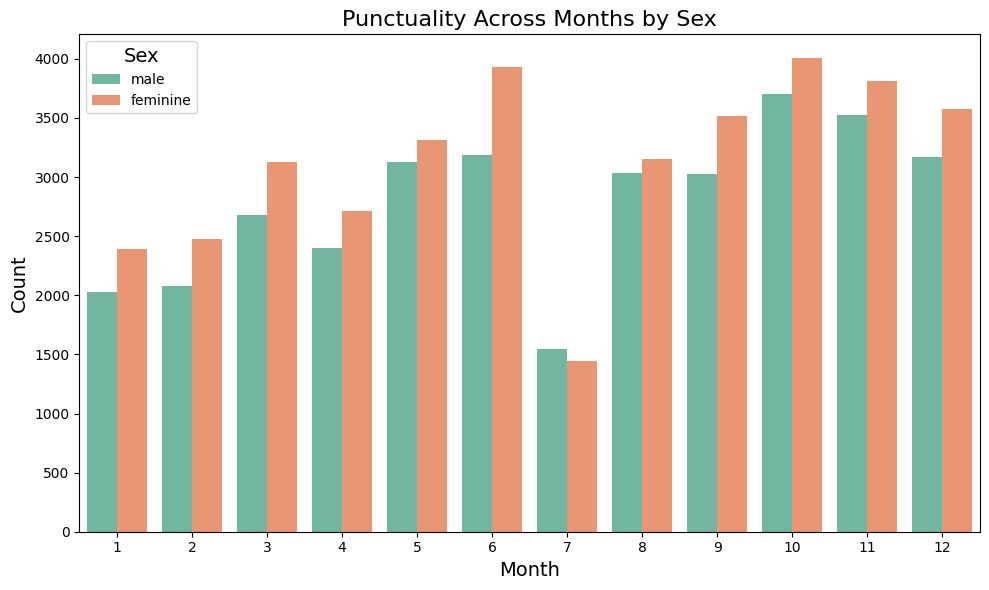

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Sex', data=data, palette='Set2')
plt.title('Punctuality Across Months by Sex', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.legend(title='Sex', title_fontsize='14')
plt.show()

**Show the trend on each month based on count of entries**

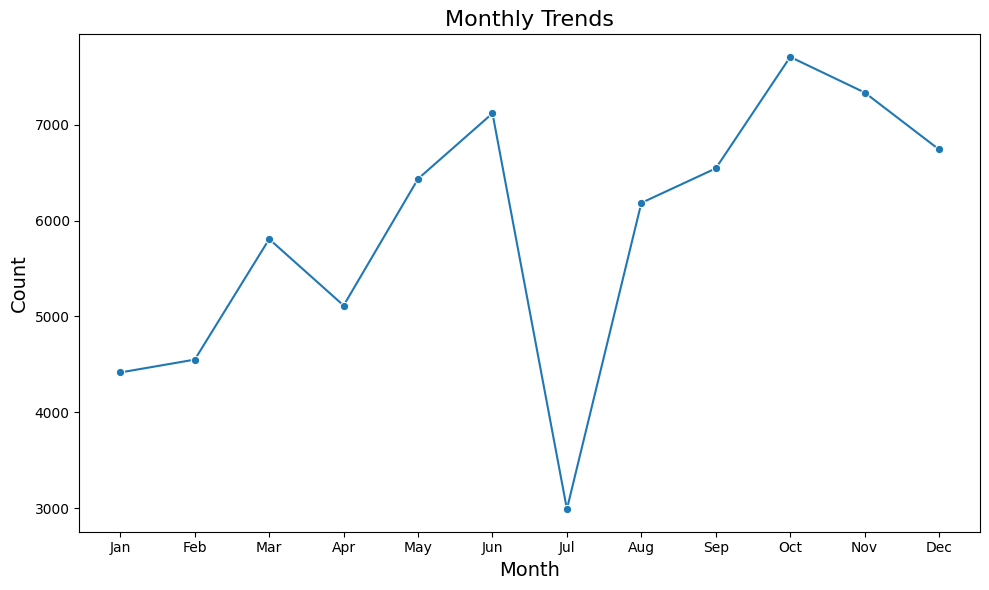

In [45]:
plt.figure(figsize=(10, 6))
data['DateTime'] = pd.to_datetime(data['DateTime'])
monthly_counts = data['Month'].value_counts().sort_index()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Monthly Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [48]:
data.head()

,ID,DateTime,Type,M,Sex,Formation,Rank,Class,Job title,qualification,Month,DayOfWeek
0,40100635,2022-12-31 19:02:20,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary,12,5
1,40100635,2022-12-31 13:03:02,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary,12,5
2,40100635,2022-12-30 18:50:23,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary,12,4
3,40100635,2022-12-30 13:09:01,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary,12,4
4,40100635,2022-12-29 19:05:26,OUT,1,male,General staff ladder,Seventh place,Class 09,Security and safety supervisor,secondary,12,3


##Modeling

**Imports**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


**Encoding categorical variables**


In [52]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Formation'] = label_encoder.fit_transform(data['Formation'])
data['Job title'] = label_encoder.fit_transform(data['Job title'])
data['qualification'] = label_encoder.fit_transform(data['qualification'])


**Data spliting to features and target, then to training and testing**

In [53]:

X = data[['Sex', 'Formation', 'Job title', 'qualification', 'Month', 'DayOfWeek']]
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Random forest training and prediction**

In [54]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

**Evaluation**

In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         OUT       1.00      1.00      1.00     14189

    accuracy                           1.00     14189
   macro avg       1.00      1.00      1.00     14189
weighted avg       1.00      1.00      1.00     14189

Accuracy: 1.0
